In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprcessing

In [34]:
netflix_df = pd.read_csv('netflix_titles_nov_2019.csv')


In [35]:
print(netflix_df.info())  
print(netflix_df.describe())  
print(netflix_df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB
None
            show_id  release_year
count  5.837000e+03   5837.000000
mean   7.730079e+07   2013.688539
std    9.479777e+06      8.419088
min    2.698800e+05   1925.000000
25%    8.004520e+07   2013.000000
50%    8.016353e+07   2016.000000
75%    8.

# Exploratory Data Analysis

Missing Values

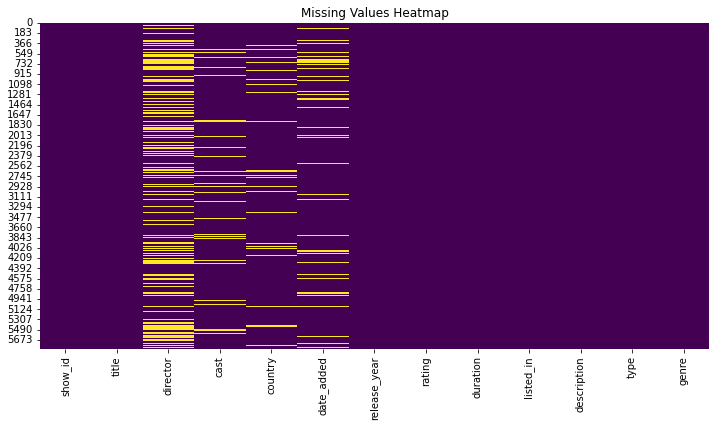

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Distribution of Movies and TV Shows

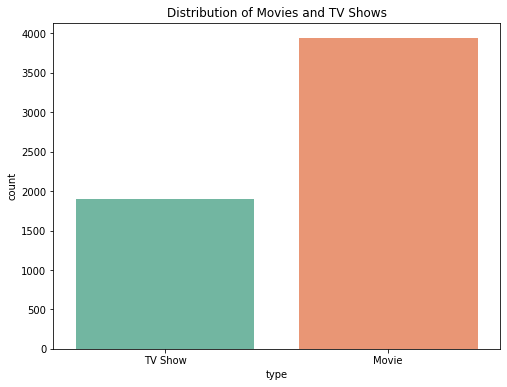

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Movies and TV Shows")
plt.show()

Release Year Analysis

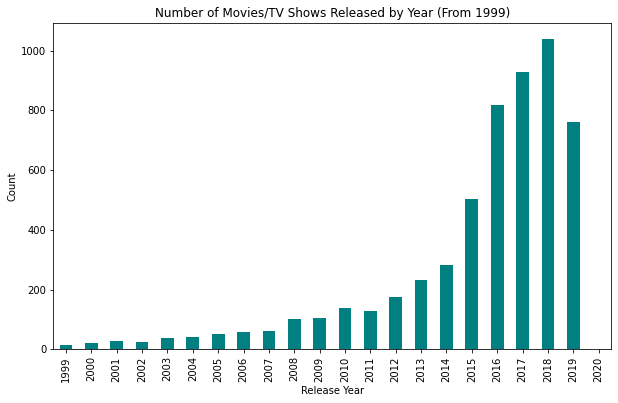

In [38]:
plt.figure(figsize=(10,6))


df_filtered = df[df['release_year'] >= 1999]


df_filtered['release_year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Number of Movies/TV Shows Released by Year (From 1999)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


Top Genres

In [39]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(','))
df_genre = df.explode('genre')

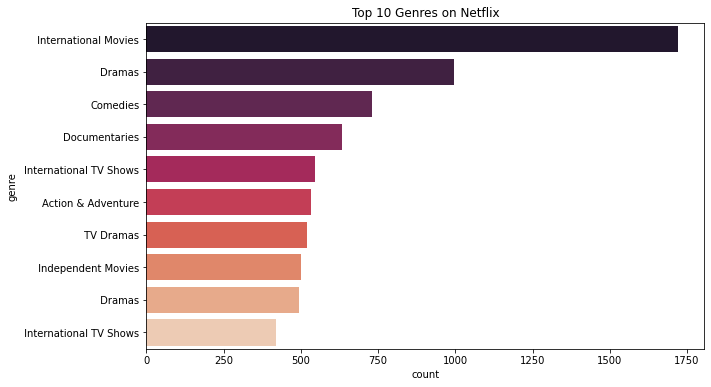

In [40]:
plt.figure(figsize=(10,6))
top_genres = df_genre['genre'].value_counts().head(10)
sns.barplot(x=top_genres, y=top_genres.index, palette='rocket')
plt.title("Top 10 Genres on Netflix")
plt.show()


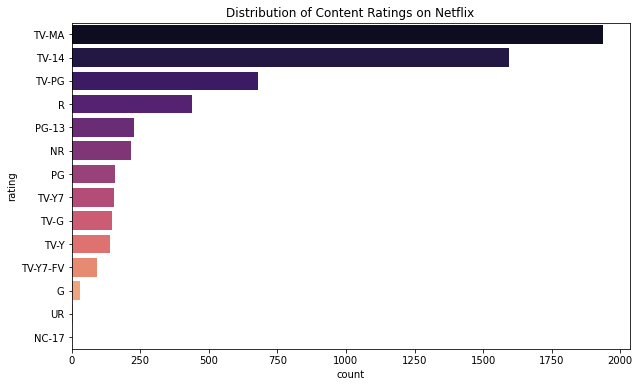

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')
plt.title("Distribution of Content Ratings on Netflix")
plt.show()

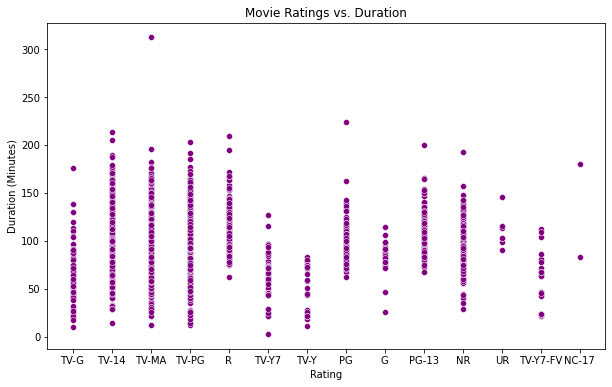

In [45]:

df_movies_ratings = df_movies.dropna(subset=['rating'])

# rating vs. duration
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_movies_ratings, x='rating', y='duration', color='purple')
plt.title("Movie Ratings vs. Duration")
plt.xlabel("Rating")
plt.ylabel("Duration (Minutes)")
plt.show()


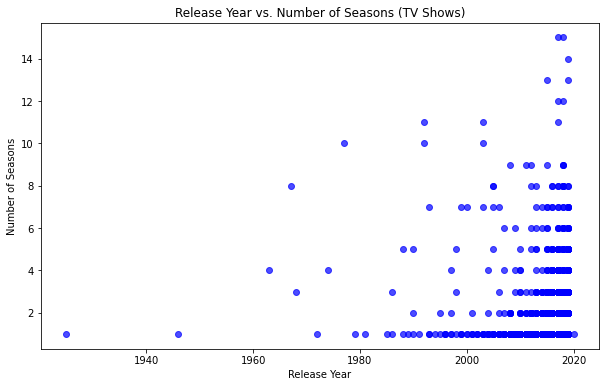

In [46]:

df_tvshows = df[df['type'] == 'TV Show']

# Convert 'duration' to numeric by extracting the number of seasons (e.g., '3 Seasons' -> 3)
df_tvshows['seasons'] = df_tvshows['duration'].str.extract('(\d+)').astype(float)

# release year vs. number of seasons
plt.figure(figsize=(10,6))
plt.scatter(df_tvshows['release_year'], df_tvshows['seasons'], color='blue', alpha=0.7)
plt.title("Release Year vs. Number of Seasons (TV Shows)")
plt.xlabel("Release Year")
plt.ylabel("Number of Seasons")
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering




df_clean = df[['type', 'release_year', 'rating', 'duration', 'country']].copy()

# Ensure 'duration' is a string before extracting the numeric part
df_clean['duration'] = df_clean['duration'].astype(str).str.extract('(\d+)').astype(float)

encoder = LabelEncoder()
df_clean['type_encoded'] = encoder.fit_transform(df_clean['type'].astype(str))
df_clean['country_encoded'] = encoder.fit_transform(df_clean['country'].astype(str))
df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'].astype(str))

df_clean = df_clean.dropna()

X = df_clean[['release_year', 'duration', 'type_encoded', 'country_encoded', 'rating_encoded']]

df_clean.head()


,type,release_year,rating,duration,country,type_encoded,country_encoded,rating_encoded
0,TV Show,2019,TV-14,1.0,South Korea,1,314,6
2,Movie,2019,TV-14,135.0,India,0,186,6
3,Movie,2019,TV-14,106.0,"France, Senegal, Belgium",0,148,6
4,TV Show,2019,TV-Y,2.0,"Canada, United Kingdom",1,65,10
5,Movie,2018,TV-14,107.0,Nigeria,0,266,6


In [48]:

df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
genre           object
dtype: object

# Agglomerative Clustering

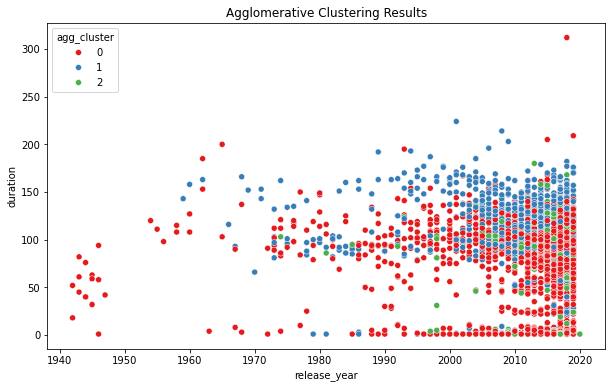

   release_year  duration  agg_cluster
0          2019       1.0            0
2          2019     135.0            1
3          2019     106.0            1
4          2019       2.0            2
5          2018     107.0            1


In [49]:
df_clean = df[['type', 'release_year', 'rating', 'duration', 'country']].copy()

# Ensure 'duration' is a string before extracting the numeric part
df_clean['duration'] = df_clean['duration'].astype(str).str.extract('(\d+)').astype(float)

encoder = LabelEncoder()
df_clean['type_encoded'] = encoder.fit_transform(df_clean['type'].astype(str))
df_clean['country_encoded'] = encoder.fit_transform(df_clean['country'].astype(str))
df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'].astype(str))

df_clean = df_clean.dropna()

X = df_clean[['release_year', 'duration', 'type_encoded', 'country_encoded', 'rating_encoded']]

df_clean.head()


agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

# Add labels to dataframe
df_clean['agg_cluster'] = agg_labels

# Visualize Agglomerative Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_year', y='duration', hue='agg_cluster', data=df_clean, palette='Set1')
plt.title("Agglomerative Clustering Results")
plt.show()

# Display results
print(df_clean[['release_year', 'duration', 'agg_cluster']].head())

In [50]:
# Filter for movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Preprocessing: Extract numeric values from 'duration' and ensure 'rating' is categorical
movies_df['duration'] = movies_df['duration'].astype(str).str.extract('(\d+)').astype(float)
movies_df = movies_df.dropna(subset=['duration', 'rating'])  # Drop rows with missing duration or rating

# Encode 'rating' to numeric
encoder = LabelEncoder()
movies_df['rating_encoded'] = encoder.fit_transform(movies_df['rating'].astype(str))

# Features to use for clustering: 'duration' and 'rating_encoded'
X = movies_df[['duration', 'rating_encoded']]

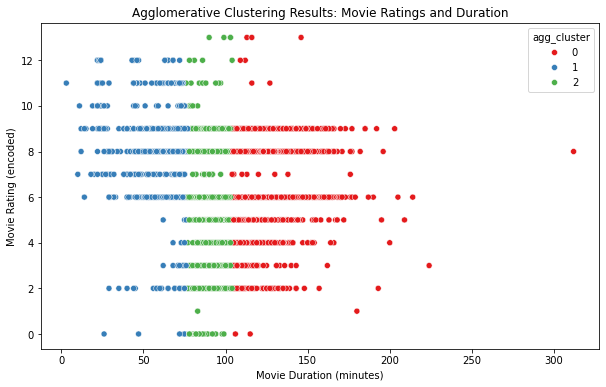

   duration rating  agg_cluster
1      67.0   TV-G            1
2     135.0  TV-14            0
3     106.0  TV-14            0
5     107.0  TV-14            0
6      81.0  TV-MA            2


In [51]:

agg_clustering = AgglomerativeClustering(n_clusters=3)  
agg_labels = agg_clustering.fit_predict(X)
movies_df['agg_cluster'] = agg_labels

# Visualize Agglomerative Clustering for Movie Ratings and Duration
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='rating_encoded', hue='agg_cluster', data=movies_df, palette='Set1')
plt.title("Agglomerative Clustering Results: Movie Ratings and Duration")
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Movie Rating (encoded)")
plt.show()


print(movies_df[['duration', 'rating', 'agg_cluster']].head())


# DBSCAN

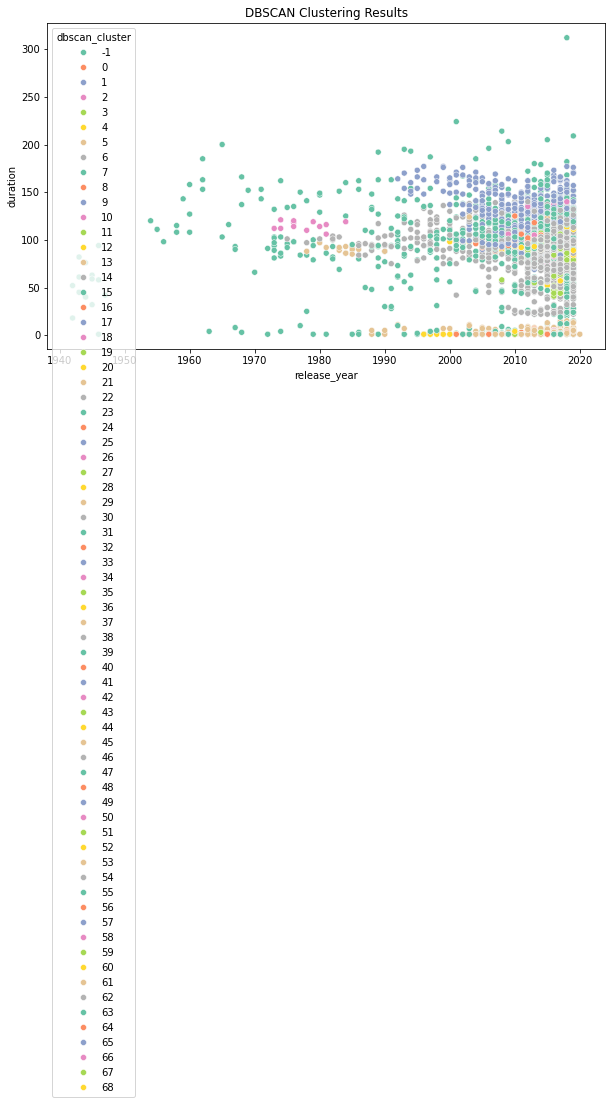

   release_year  duration  dbscan_cluster
0          2019       1.0               0
2          2019     135.0               1
3          2019     106.0              -1
4          2019       2.0               2
5          2018     107.0               3


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN



# Preprocessing
df_clean = df[['type', 'release_year', 'rating', 'duration', 'country']].copy()
df_clean['duration'] = df_clean['duration'].str.extract('(\d+)').astype(float)
encoder = LabelEncoder()

df_clean['type_encoded'] = encoder.fit_transform(df_clean['type'].astype(str))
df_clean['country_encoded'] = encoder.fit_transform(df_clean['country'].astype(str))
df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'].astype(str))
df_clean = df_clean.dropna()

X = df_clean[['release_year', 'duration', 'type_encoded', 'country_encoded', 'rating_encoded']]

# DBSCAN Clustering
dbscan_clustering = DBSCAN(eps=6, min_samples=6)
dbscan_labels = dbscan_clustering.fit_predict(X)

# Add labels to dataframe
df_clean['dbscan_cluster'] = dbscan_labels

# Visualize DBSCAN Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_year', y='duration', hue='dbscan_cluster', data=df_clean, palette='Set2')
plt.title("DBSCAN Clustering Results")
plt.show()

# Display results
print(df_clean[['release_year', 'duration', 'dbscan_cluster']].head())


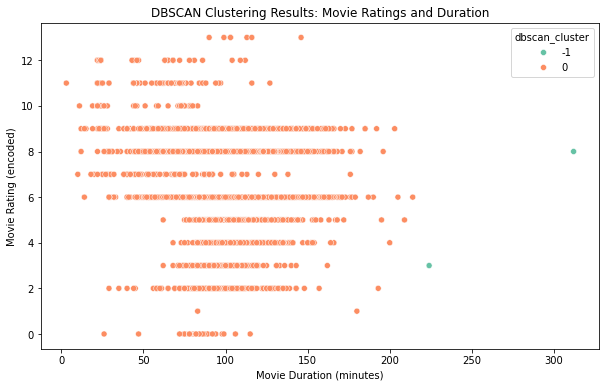

   duration rating  dbscan_cluster
1      67.0   TV-G               0
2     135.0  TV-14               0
3     106.0  TV-14               0
5     107.0  TV-14               0
6      81.0  TV-MA               0


In [53]:


# Filter for movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Preprocessing: Extract numeric values from 'duration' and ensure 'rating' is categorical
movies_df['duration'] = movies_df['duration'].astype(str).str.extract('(\d+)').astype(float)
movies_df = movies_df.dropna(subset=['duration', 'rating'])  # Drop rows with missing duration or rating

# Encode 'rating' to numeric
encoder = LabelEncoder()
movies_df['rating_encoded'] = encoder.fit_transform(movies_df['rating'].astype(str))

# Features to use for clustering: 'duration' and 'rating_encoded'
X = movies_df[['duration', 'rating_encoded']]

# DBSCAN Clustering
dbscan_clustering = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan_clustering.fit_predict(X)

# Add labels to dataframe
movies_df['dbscan_cluster'] = dbscan_labels

# Visualize DBSCAN Clustering for Movie Ratings and Duration
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='rating_encoded', hue='dbscan_cluster', data=movies_df, palette='Set2')
plt.title("DBSCAN Clustering Results: Movie Ratings and Duration")
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Movie Rating (encoded)")
plt.show()

# Display first few results
print(movies_df[['duration', 'rating', 'dbscan_cluster']].head())


# Mean Shift

In [54]:
pip install --upgrade numpy scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.


['TV-G' 'TV-14' 'TV-MA' 'TV-PG' 'R' 'TV-Y7' 'TV-Y' 'PG' 'G' 'PG-13' 'NR'
 'UR' 'TV-Y7-FV' 'NC-17']


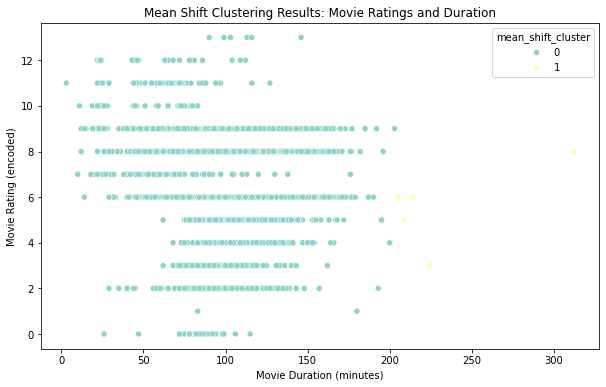

   duration rating  mean_shift_cluster
1        67   TV-G                   0
2       135  TV-14                   0
3       106  TV-14                   0
5       107  TV-14                   0
6        81  TV-MA                   0


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MeanShift



# Filter for movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Preprocessing: Extract numeric values from 'duration' and ensure 'rating' is categorical
movies_df['duration'] = movies_df['duration'].astype(str).str.extract('(\d+)')
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')

# Drop rows with missing duration or rating
movies_df = movies_df.dropna(subset=['duration', 'rating'])

# Check unique ratings
print(movies_df['rating'].unique())

# Encode 'rating' to numeric
encoder = LabelEncoder()
movies_df['rating_encoded'] = encoder.fit_transform(movies_df['rating'].astype(str))

# Features to use for clustering: 'duration' and 'rating_encoded'
X = movies_df[['duration', 'rating_encoded']]

# Mean Shift Clustering
mean_shift_clustering = MeanShift()
mean_shift_labels = mean_shift_clustering.fit_predict(X)

# Add labels to dataframe
movies_df['mean_shift_cluster'] = mean_shift_labels

# Visualize Mean Shift Clustering for Movie Ratings and Duration
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='rating_encoded', hue='mean_shift_cluster', data=movies_df, palette='Set3')
plt.title("Mean Shift Clustering Results: Movie Ratings and Duration")
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Movie Rating (encoded)")
plt.show()

# Display first few results
print(movies_df[['duration', 'rating', 'mean_shift_cluster']].head())


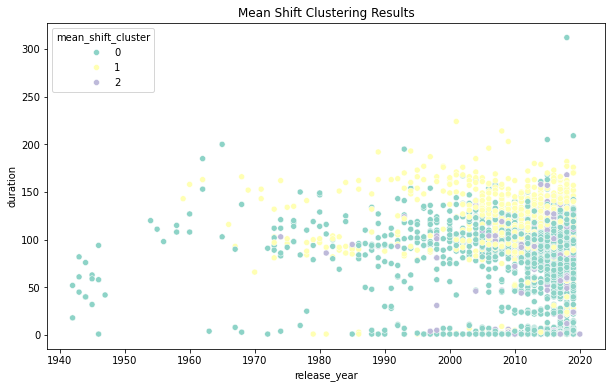

   release_year  duration  mean_shift_cluster
0          2019       1.0                   0
2          2019     135.0                   1
3          2019     106.0                   1
4          2019       2.0                   2
5          2018     107.0                   1


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MeanShift

# Assuming df is defined and available

# Preprocessing
df_clean = df[['type', 'release_year', 'rating', 'duration', 'country']].copy()
df_clean['duration'] = df_clean['duration'].str.extract('(\d+)').astype(float)
encoder = LabelEncoder()

df_clean['type_encoded'] = encoder.fit_transform(df_clean['type'].astype(str))
df_clean['country_encoded'] = encoder.fit_transform(df_clean['country'].astype(str))
df_clean['rating_encoded'] = encoder.fit_transform(df_clean['rating'].astype(str))
df_clean = df_clean.dropna()

X = df_clean[['release_year', 'duration', 'type_encoded', 'country_encoded', 'rating_encoded']]

# Mean Shift Clustering
mean_shift_clustering = MeanShift()
mean_shift_labels = mean_shift_clustering.fit_predict(X)

# Add labels to dataframe
df_clean['mean_shift_cluster'] = mean_shift_labels

# Visualize Mean Shift Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='release_year', y='duration', hue='mean_shift_cluster', data=df_clean, palette='Set3')
plt.title("Mean Shift Clustering Results")
plt.show()

# Display results
print(df_clean[['release_year', 'duration', 'mean_shift_cluster']].head())


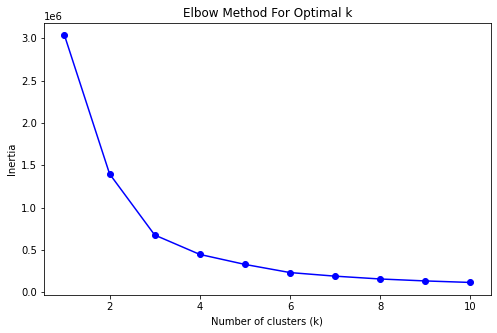

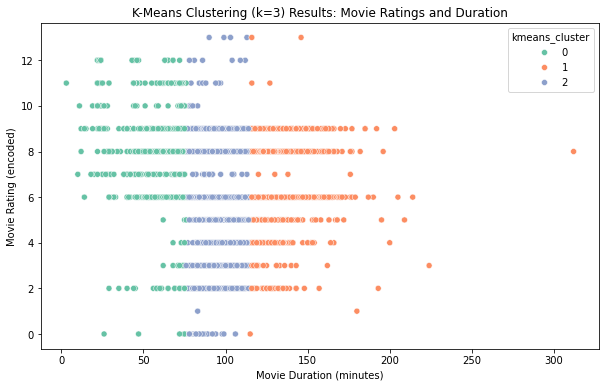

   duration rating  kmeans_cluster
1        67   TV-G               0
2       135  TV-14               1
3       106  TV-14               2
5       107  TV-14               2
6        81  TV-MA               2


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocessing: Use the same steps as before
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].astype(str).str.extract('(\d+)')
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='coerce')
movies_df = movies_df.dropna(subset=['duration', 'rating'])

# Encode the 'rating' column
encoder = LabelEncoder()
movies_df['rating_encoded'] = encoder.fit_transform(movies_df['rating'].astype(str))

# Features for clustering
X = movies_df[['duration', 'rating_encoded']]

# Elbow Method: Calculate inertia for different numbers of clusters (K)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# From the plot, determine the "elbow point" where the curve bends (say k=3)
optimal_k = 3  # Replace with the actual value you select from the graph

# K-Means Clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies_df['kmeans_cluster'] = kmeans.fit_predict(X)

# Visualize K-Means Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='rating_encoded', hue='kmeans_cluster', data=movies_df, palette='Set2')
plt.title(f'K-Means Clustering (k={optimal_k}) Results: Movie Ratings and Duration')
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Movie Rating (encoded)")
plt.show()

# Display first few results
print(movies_df[['duration', 'rating', 'kmeans_cluster']].head())


In [58]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')


Silhouette Score for k=3: 0.5640582721375896
